# Разведочный анализ данных. Исследование и визуализация данных
## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных по определению количественного показателя прогрессирования заболевания через год после исходного уровня. <br><br>
Датасет содержит следующие колонки:
```
age - возраст в годах
sex - пол
bmi - индекс массы тела
bp - среднее артериальное давление
s1 - tc, общий холестерин сыворотки
s2 - ldl, липопротеины низкой плотности
s3 - hdl, липопротеины высокой плотности
s4 - tch, общий холестерин / ЛПВП
s5 - ltg, логарифм уровня триглицеридов в сыворотке
s6 - glu, уровень сахара в крови
target - количественный показатель прогрессирования заболевания через год после исходного уровня
```


# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.datasets import *

# Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.<br>
Для дальнейшей работы с данными их необходимо преобразовать Pandas Dataframe 

In [3]:
diabet = load_diabetes()
data=pd.DataFrame(data= np.c_[diabet['data'], diabet['target']],
                     columns= diabet['feature_names'] + ['target'])

## 2) Основные характеристики датасета

In [4]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
# Размер датасета - 442 строк, 11 колонок
rows_count = data.shape[0]
columns_count = data.shape[1]
print('Всего строк: {}\nВсего колонок: {}'.format(rows_count, columns_count))

Всего строк: 442
Всего колонок: 11


In [8]:
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
bmi - 0
bp - 0
s1 - 0
s2 - 0
s3 - 0
s4 - 0
s5 - 0
s6 - 0
target - 0


In [10]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## 3) Визуальное исследование датасета

### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='s2', ylabel='s1'>

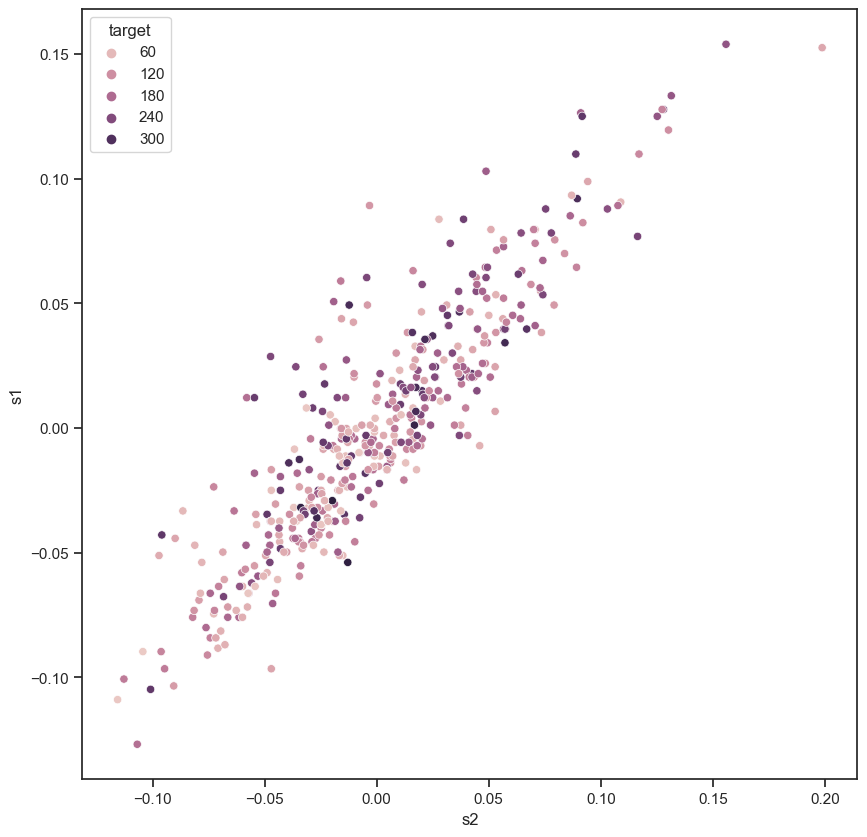

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='s2', y='s1', data=data, hue='target')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

C:\Users\rybin\AppData\Local\Temp\ipykernel_5804\965654148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['s1'])
C:\Users\rybin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='s1', ylabel='Density'>

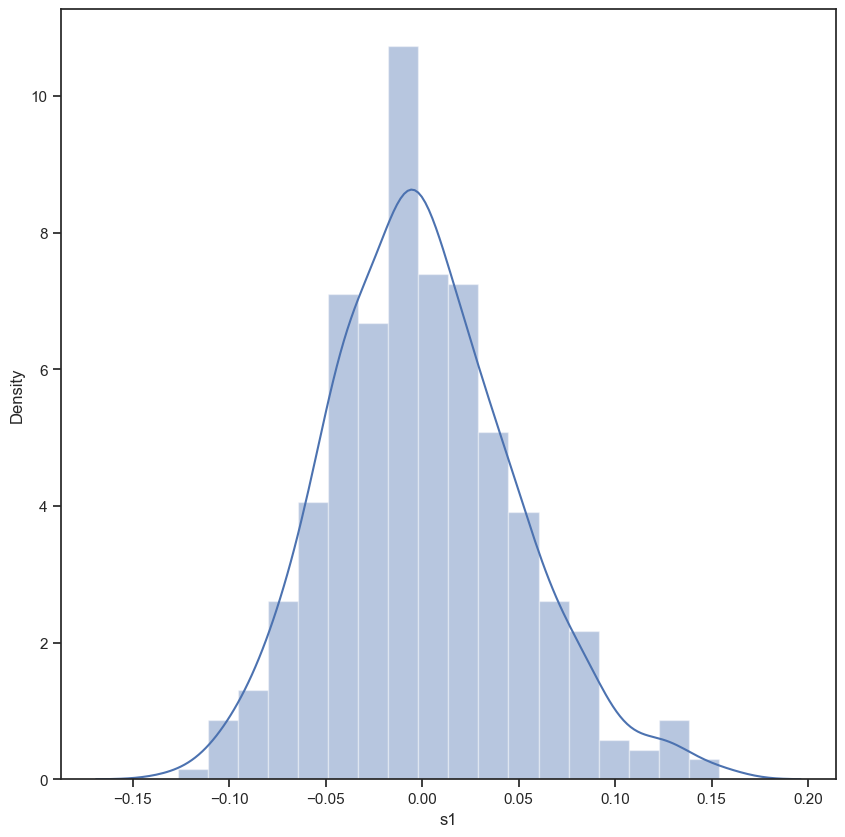

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['s1'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

C:\Users\rybin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rybin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


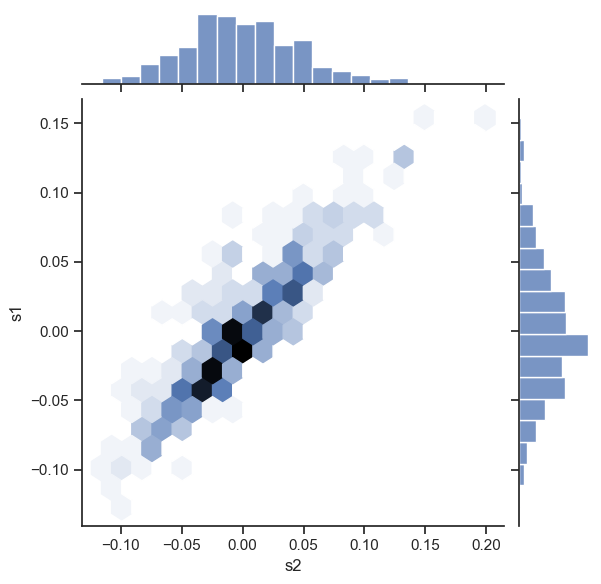

In [27]:
sns.jointplot(x='s2', y='s1', data=data, kind="hex")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.<br>

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателе й.

C:\Users\rybin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rybin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rybin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rybin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

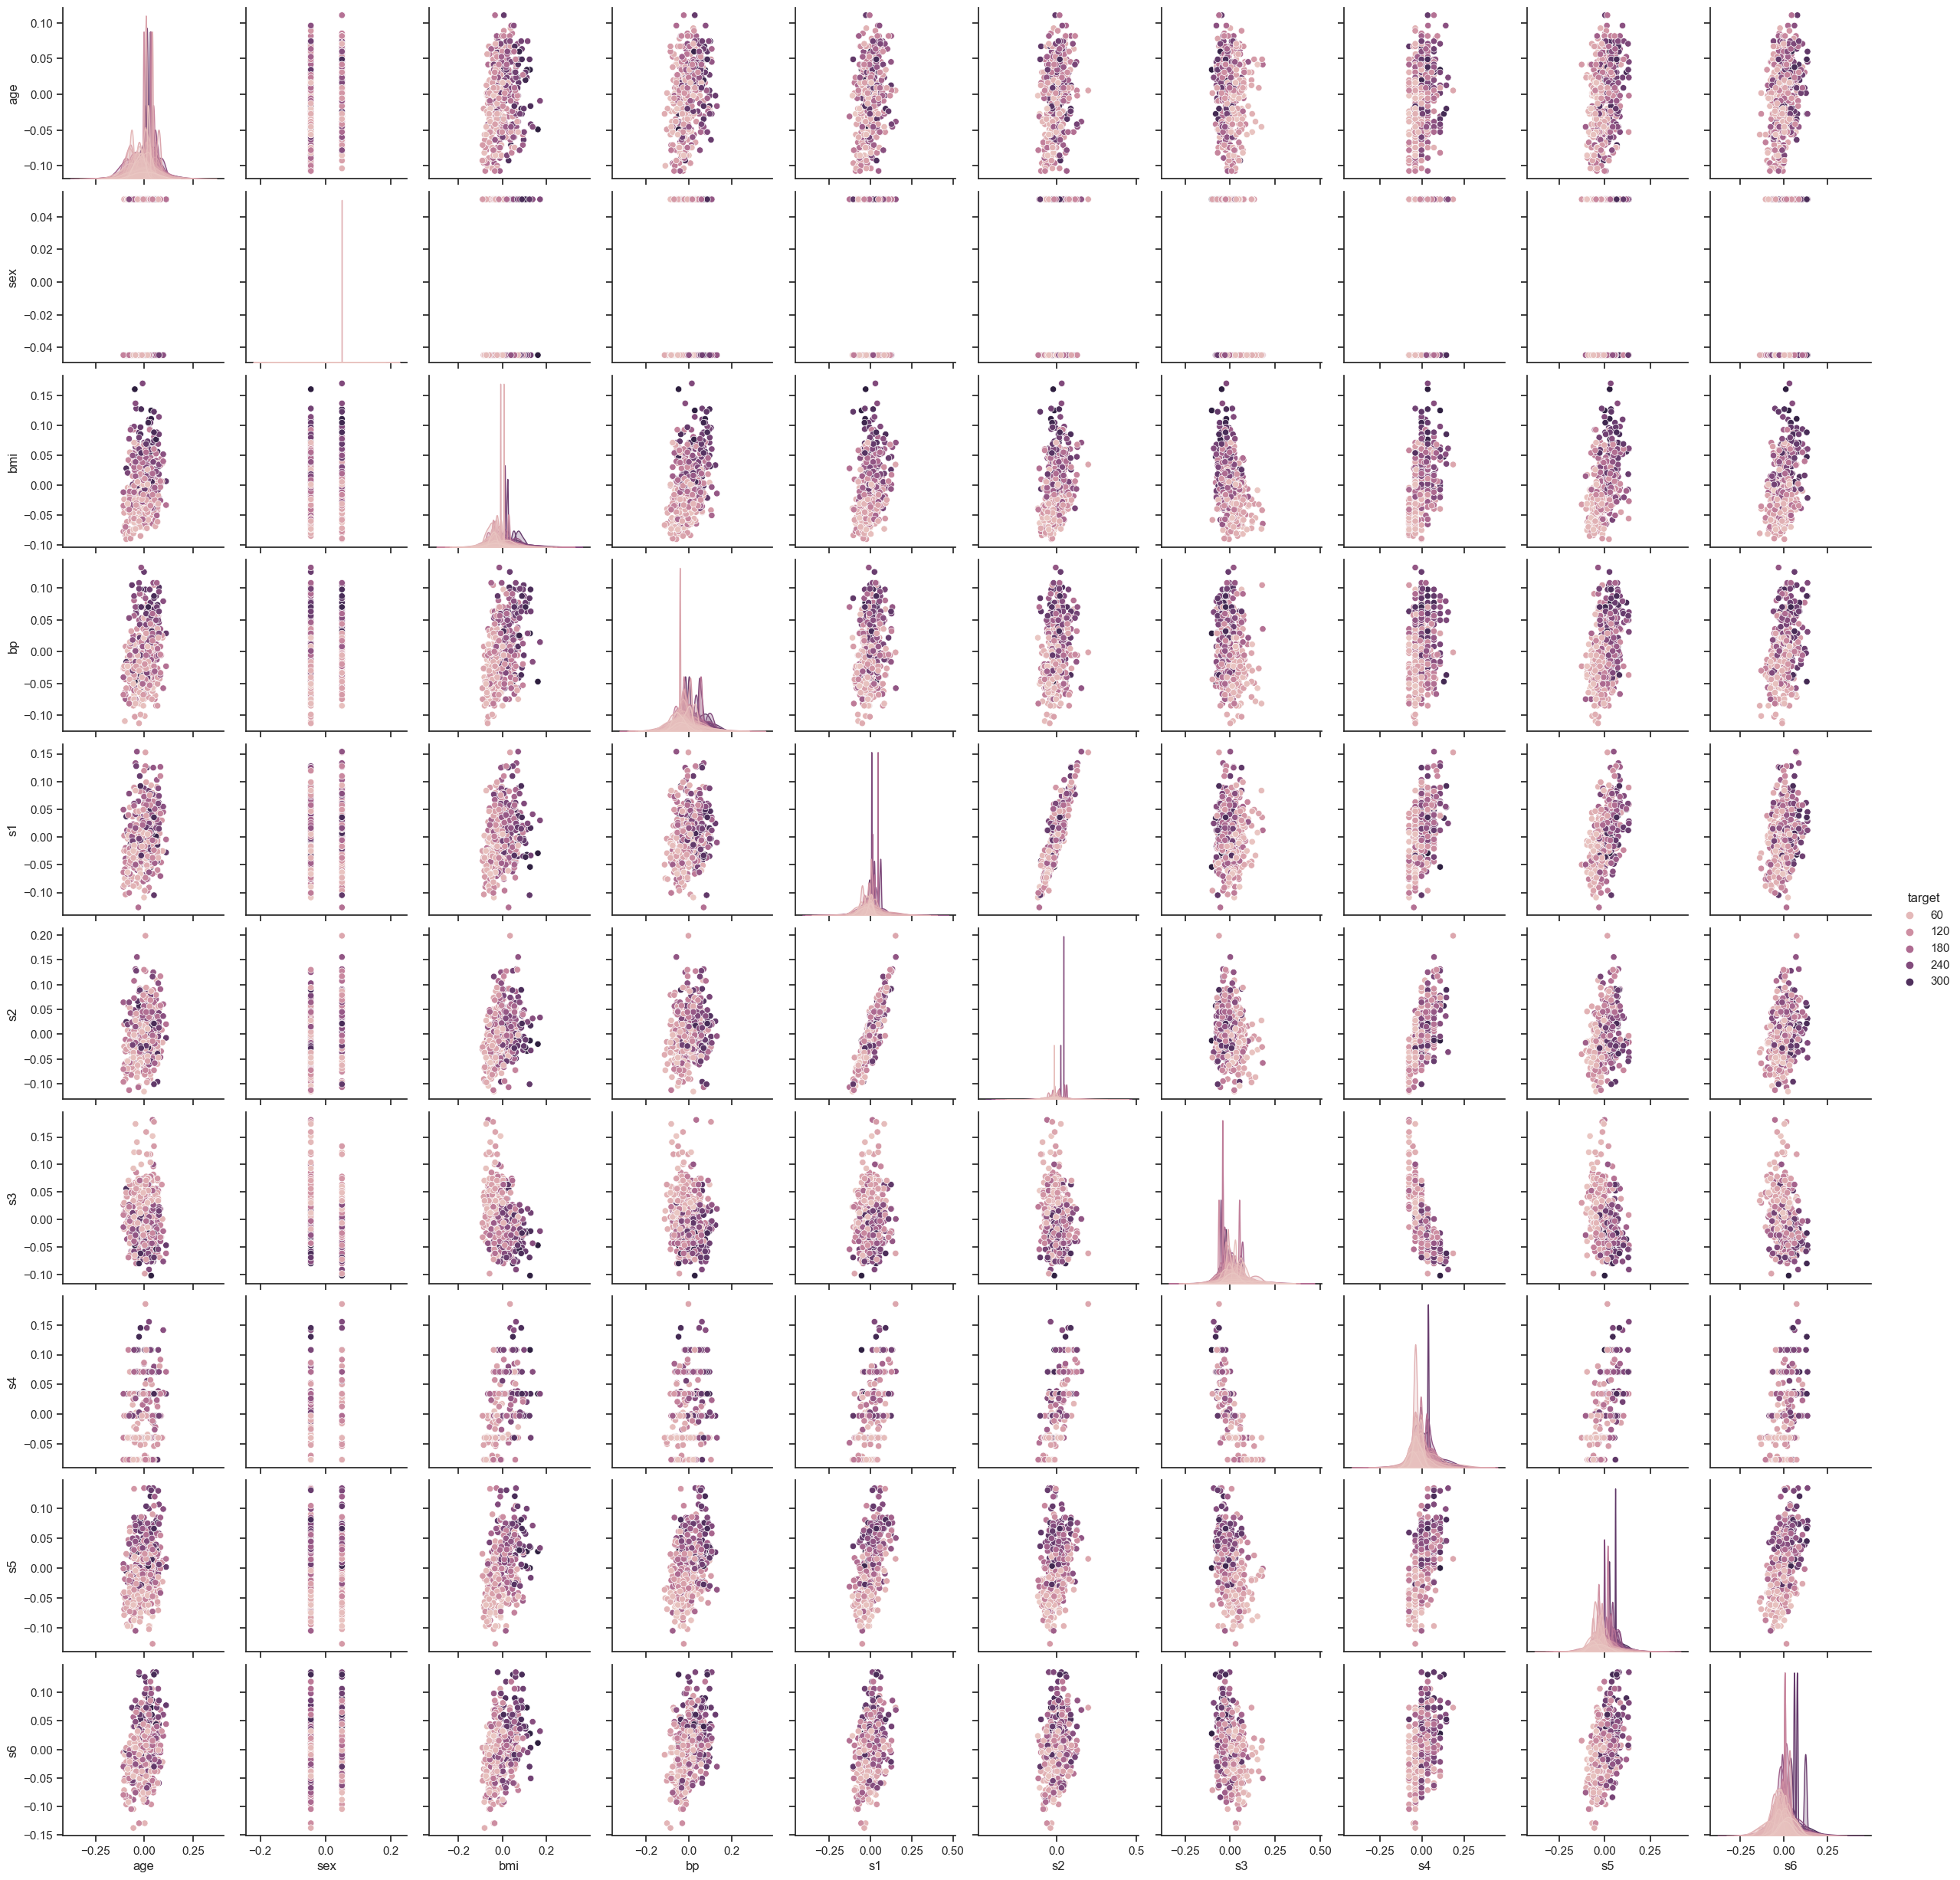

In [29]:
sns.pairplot(data, hue="target")

### Ящик с усами
Отображает одномерное распределение вероятности.

<Axes: xlabel='sex', ylabel='target'>

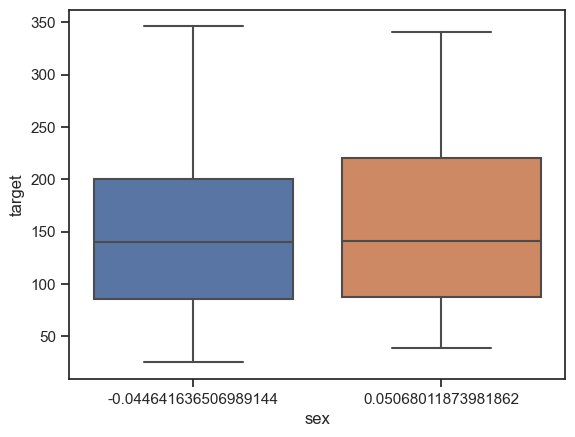

In [30]:
sns.boxplot(x='sex', y='target', data=data)

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

<Axes: xlabel='sex', ylabel='target'>

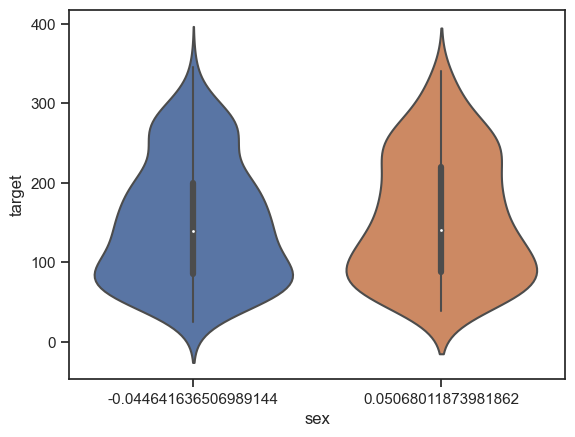

In [31]:
sns.violinplot(x='sex', y='target', data=data)

### 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

  1.   Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "target"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
 2.    Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.


In [32]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков. <br>
Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).<br>
На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с bmi (0.59) и s5 - ltg, логарифмом уровня триглицеридов в сыворотке (0.57). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с bp (0.44) и s4 - tch, общим холестерином / ЛПВП (0.43). Эти признаки стоит также оставить в модели.
- s1 - tc, общий холестерин сыворотки и s2 - ldl, липопротеины низкой плотности очень сильно коррелируют между собой (0.9). Поэтому из этих признаков в модели можно оставлять только один.
- Также можно сделать вывод, что выбирая из s2 и s1 лучше выбрать s1, потому что он сильнее коррелирован с целевым признаком.

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

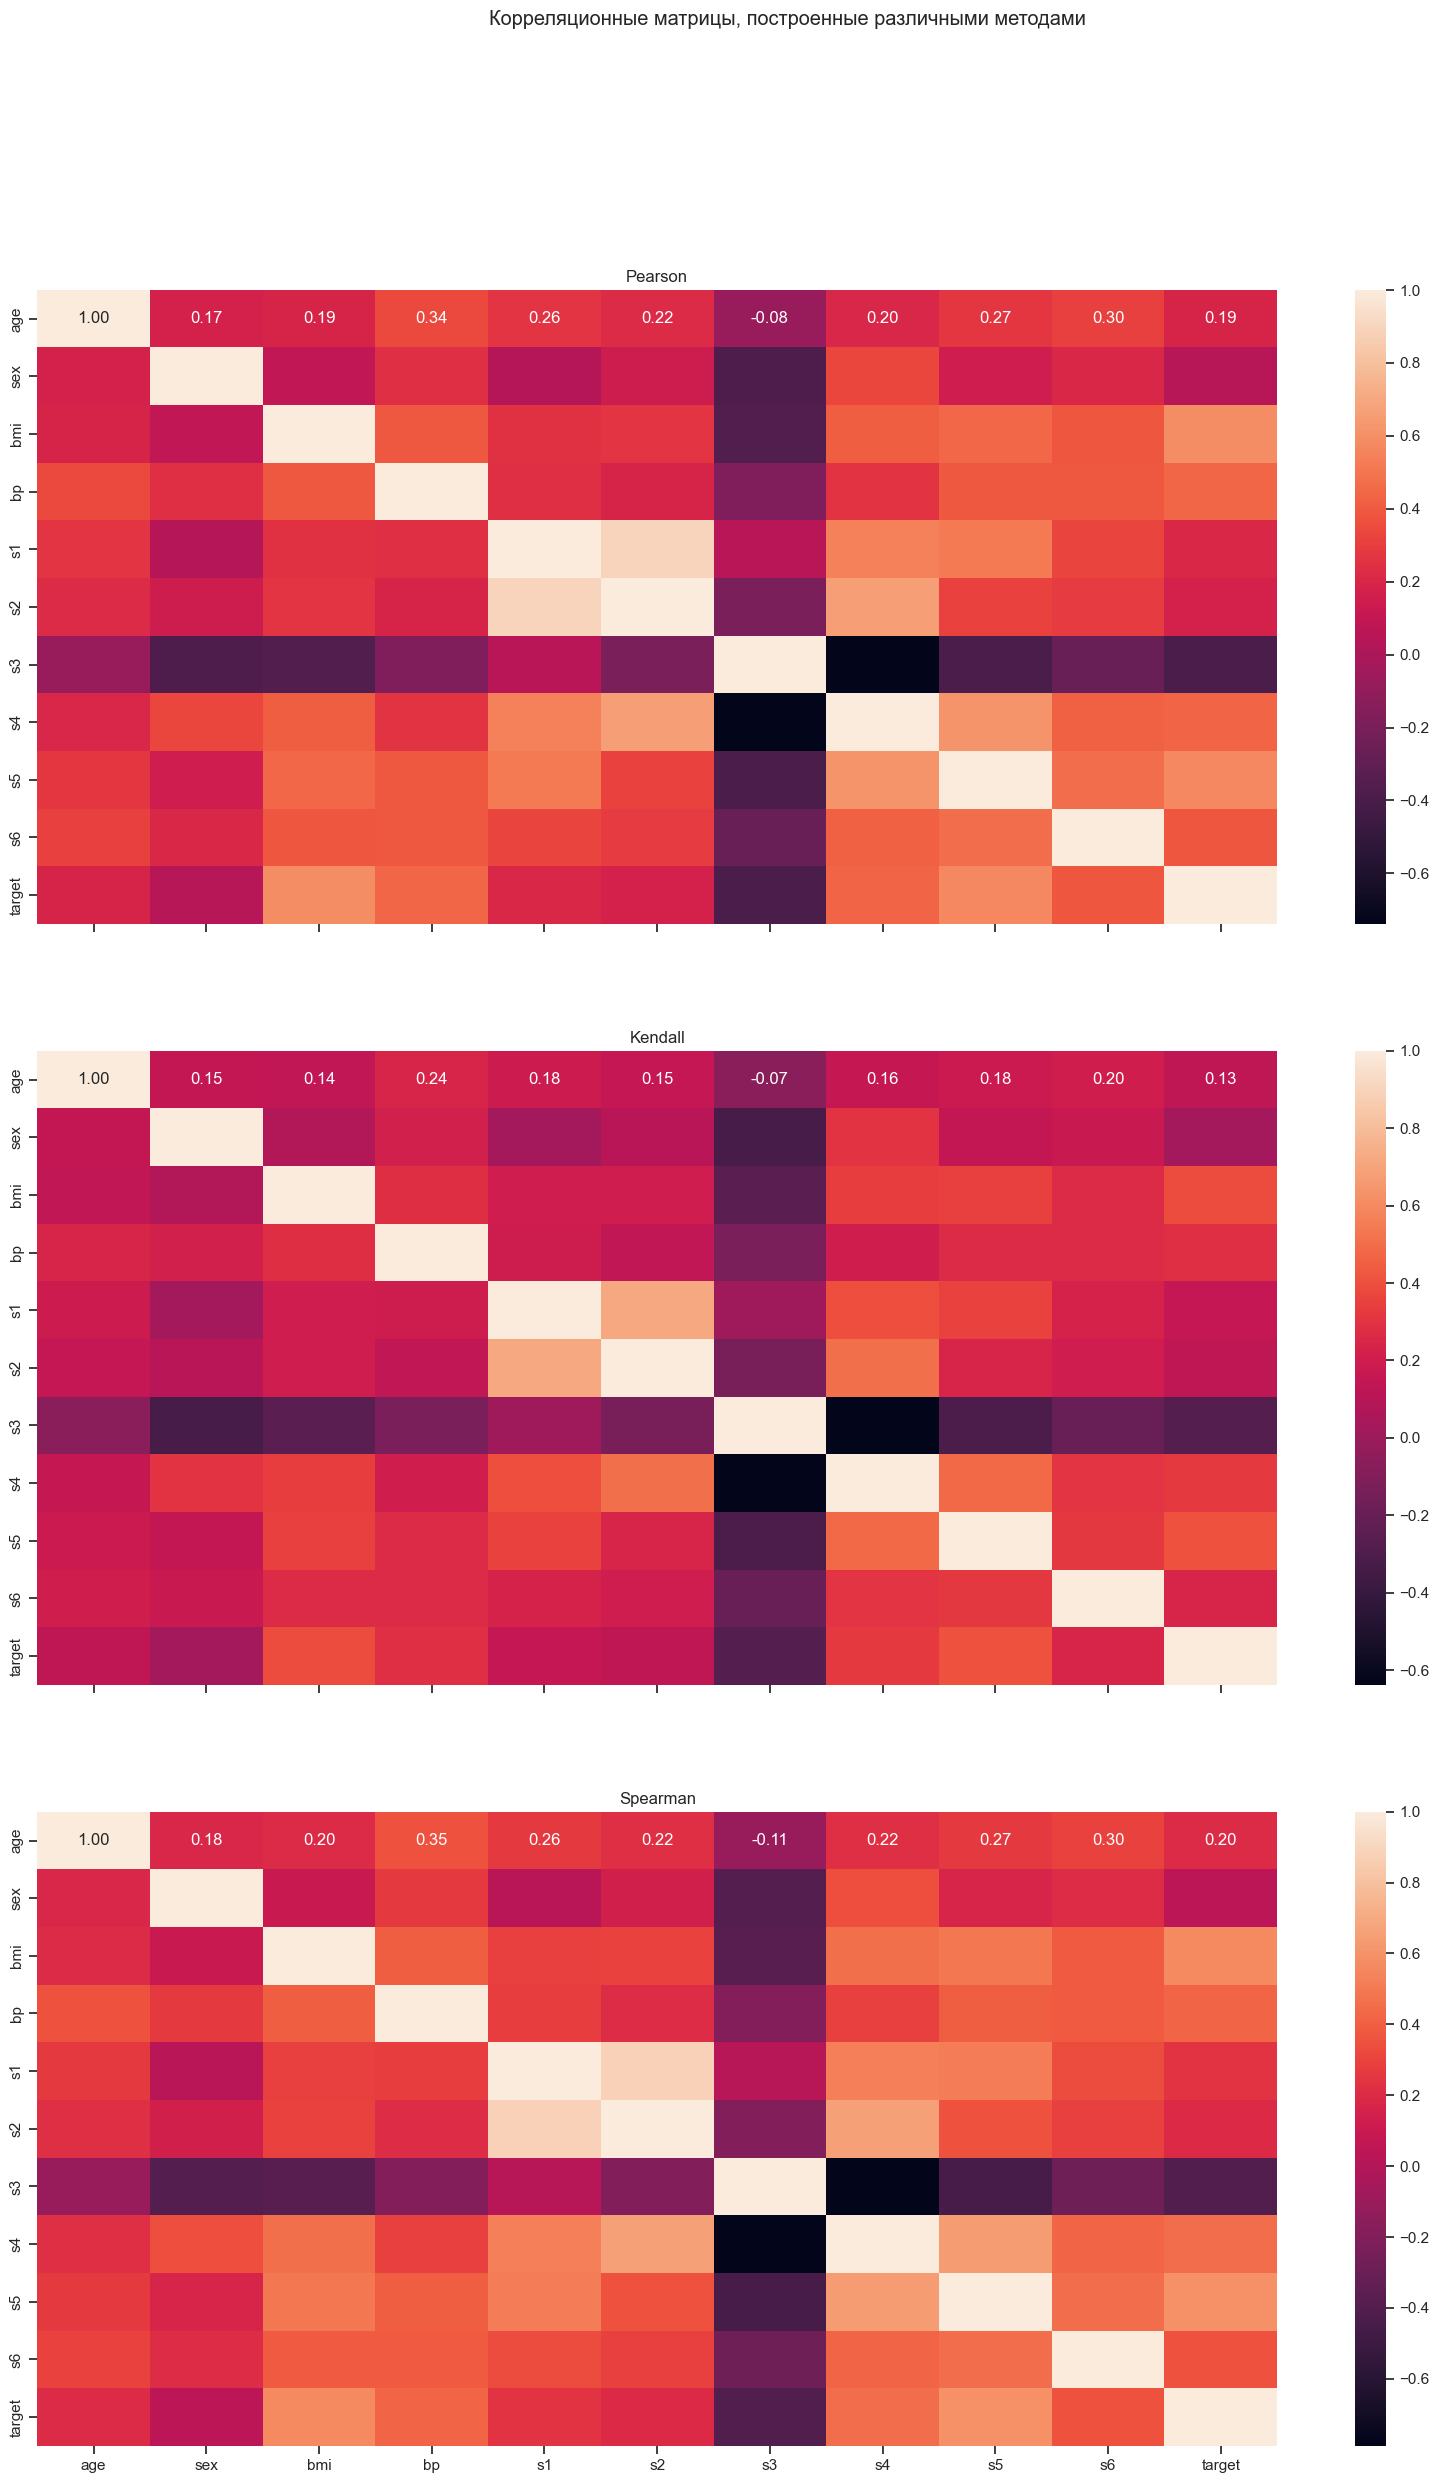

In [51]:
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(20,28))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')